In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# 波形信号样例

In [2]:
fs = 1000
t = np.arange(0, 5, 1 / fs)
wave = (t**2-5*t+5)*np.sin(2*np.pi*(25*t + 10*np.sin(1.5*t)))

# 滑动窗口

In [3]:
from dse_pkgs.dse_vib import sliding_window_wave

t2, wave_sliced = sliding_window_wave(wave, fs, fs_slice = 5, time_duration = 0.5)

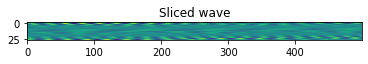

In [4]:
plt.imshow(wave_sliced)
plt.title('Sliced wave')
plt.show()

# 带通滤波

In [5]:
from dse_pkgs.dse_vib import filt_wave

wave_filted = filt_wave(wave, fs, 30, 50)
wave_sliced_filted = filt_wave(wave_sliced, fs, 30, 50)

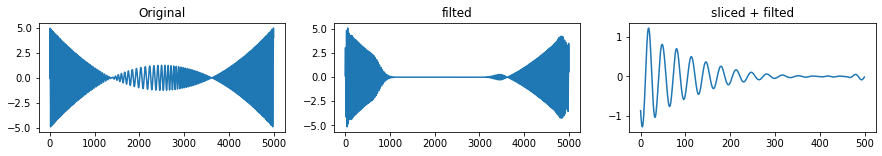

In [6]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('filted')
plt.plot(wave_filted)
plt.subplot(133)
plt.title('sliced + filted')
plt.plot(wave_sliced_filted[5])
plt.show()

# 包络

In [7]:
from dse_pkgs.dse_vib import envelop_wave

wave_enveloped = envelop_wave(wave)
wave_sliced_enveloped = envelop_wave(wave_sliced)

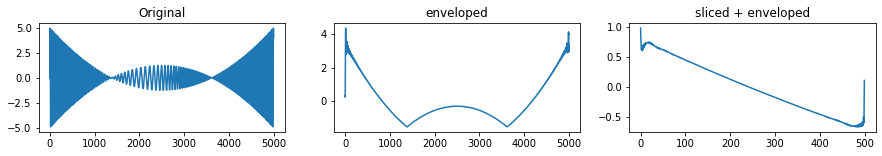

In [8]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('enveloped')
plt.plot(wave_enveloped)
plt.subplot(133)
plt.title('sliced + enveloped')
plt.plot(wave_sliced_enveloped[5])
plt.show()

# 快速傅里叶

In [9]:
from dse_pkgs.dse_vib import fft_wave

f, spectrum = fft_wave(wave, fs)
f2, tf_spectrum = fft_wave(wave_sliced, fs)

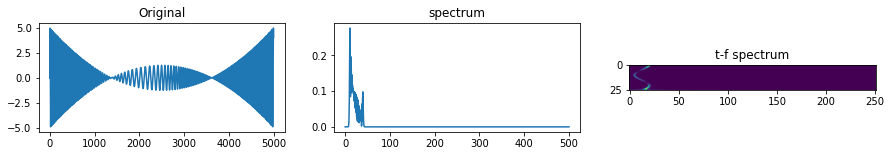

In [10]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('spectrum')
plt.plot(f, abs(spectrum))
plt.subplot(133)
plt.title('t-f spectrum')
plt.imshow(abs(tf_spectrum))
plt.show()

# 短时傅里叶变换与逆短时傅里叶变换

In [11]:
from dse_pkgs.dse_vib import stft_wave
from dse_pkgs.dse_vib import istft_spec

t, f, spectrum = stft_wave(wave, fs, fs_slice = 5, time_duration = 0.5)
wave_recon = istft_spec(spectrum, fs, fs_slice = 5, time_duration = 0.5)

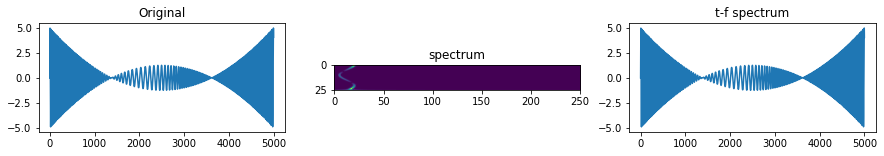

In [12]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('spectrum')
plt.imshow(abs(spectrum))
plt.subplot(133)
plt.title('t-f spectrum')
plt.plot(wave_recon)
plt.show()

# 时域特征

In [13]:
from dse_pkgs.dse_vib import time_domain_features_wave

tdf = time_domain_features_wave(wave)
tdf2 = time_domain_features_wave(wave_sliced)

In [14]:
pd.DataFrame(tdf, index = [0])

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor
0,0.007478,1.005576,2.088579,1.445192,4.971997,1.445211,0.76877,4.723064,0.031574,3.440326,9.867753,2.088635,6.467473,1.437198,4.944429


In [15]:
pd.DataFrame(tdf2)

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor
0,0.015180,1.403211,4.881787,2.209477,4.960227,2.209529,0.638851,3.057763,0.014822,2.244925,9.855982,4.882018,7.764289,1.574624,3.534913
1,0.065045,2.257546,7.147708,2.673520,4.960227,2.674311,1.839322,1.813580,-0.030520,1.854768,9.855982,7.151939,2.696769,1.184610,2.197176
2,0.054089,2.020185,5.227744,2.286426,4.233896,2.287066,1.824332,1.712131,-0.030652,1.851235,8.393435,5.230669,2.320792,1.132107,2.095796
3,-0.006253,1.519431,2.995017,1.730612,3.362710,1.730623,1.372352,1.794139,0.005544,1.943063,6.677904,2.995055,2.450326,1.138994,2.213138
4,0.019457,1.062951,1.514179,1.230520,2.527189,1.230674,0.950919,1.962257,0.005482,2.053501,5.000185,1.514557,2.657629,1.157789,2.377521
5,0.000007,0.650966,0.616029,0.784875,1.794134,0.784875,0.566502,2.338860,0.002870,2.285885,3.552352,0.616029,3.167042,1.205709,2.756111
6,-0.012197,0.309783,0.181213,0.425691,1.139982,0.425866,0.235209,3.300753,-0.054480,2.676858,2.220838,0.181361,4.846665,1.374724,3.679940
7,-0.017651,0.179998,0.052927,0.230059,0.558697,0.230735,0.146027,2.642905,-0.107938,2.421376,1.057105,0.053239,3.825993,1.281879,3.103912
8,0.011571,0.273213,0.125529,0.354300,0.817516,0.354489,0.217247,2.683844,0.082439,2.306181,1.574700,0.125663,3.763073,1.297481,2.992227
9,0.021183,0.477696,0.300920,0.548562,1.032396,0.548971,0.428600,1.849002,0.026516,1.880603,2.016088,0.301369,2.408762,1.149206,2.161200


# 阶次幅值提取

In [16]:
from dse_pkgs.dse_vib import order_amplitude_extraction_spec

base_frequency =  25 + 15*np.cos(1.5*t)
orders = [1,2,3,4,5]
order_amplitude_extraction_spec(t, f, spectrum, base_frequency, orders)

,1x,2x,3x,4x,5x
0.0,2.312938,0.062042,0.022361,1.208620e-02,7.825305e-03
0.2,3.632487,0.006411,0.002222,1.217295e-03,7.767407e-04
0.4,2.823785,0.000243,0.000021,5.416205e-06,1.941214e-06
0.6,2.032612,0.000205,0.000015,4.031261e-06,1.566762e-06
0.8,1.315572,0.000341,0.000019,4.479053e-06,1.638730e-06
1.0,0.814790,0.000500,0.000029,7.157039e-06,2.847836e-06
1.2,0.385517,0.000703,0.000036,8.429147e-06,3.478279e-06
1.4,0.116986,0.000872,0.000038,9.426349e-06,3.201002e-06
1.6,0.394676,0.000631,0.000059,1.799062e-05,7.929947e-06
1.8,0.689860,0.002884,0.000089,2.628560e-05,1.125523e-05


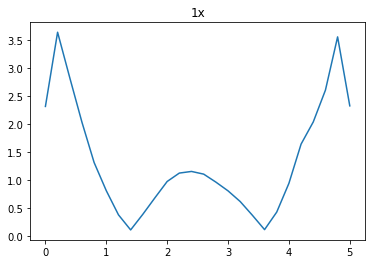

In [17]:
plt.plot(order_amplitude_extraction_spec(t, f, spectrum, base_frequency, orders)['1x'])
plt.title('1x')
plt.show()

# 频域特征

In [18]:
from dse_pkgs.dse_vib import frequency_domain_features_spec

fdf = frequency_domain_features_spec(f, spectrum)

In [19]:
pd.DataFrame(fdf)

,frequency_centre,mean_frequency,rms_frequency,se_of_raw_signal
0,52.422209,250.0,78.470546,5.220259
1,41.529745,250.0,48.192729,2.723369
2,37.487774,250.0,37.600112,2.334805
3,34.585753,250.0,34.717791,2.511624
4,30.899641,250.0,31.073319,2.642964
5,26.858520,250.0,27.074856,2.682608
6,22.918498,250.0,23.197328,2.700714
7,17.403380,250.0,18.006928,3.039649
8,13.391703,250.0,13.716551,2.394349
9,11.333830,250.0,11.596122,2.162601


# 组合操作输出时频特征

In [20]:
t2, wave_sliced = sliding_window_wave(wave, fs, fs_slice = 5, time_duration = 0.5)
f2, tf_spectrum = fft_wave(wave_sliced, fs)

tdf = time_domain_features_wave(wave_sliced)
fdf = frequency_domain_features_spec(f2, tf_spectrum)
all_features = {**tdf, **fdf}
pd.DataFrame(all_features, index = t2)

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor,frequency_centre,mean_frequency,rms_frequency,se_of_raw_signal
0.0,0.015180,1.403211,4.881787,2.209477,4.960227,2.209529,0.638851,3.057763,0.014822,2.244925,9.855982,4.882018,7.764289,1.574624,3.534913,52.441045,250.0,78.514059,5.223695
0.2,0.065045,2.257546,7.147708,2.673520,4.960227,2.674311,1.839322,1.813580,-0.030520,1.854768,9.855982,7.151939,2.696769,1.184610,2.197176,41.539984,250.0,48.222570,2.726525
0.4,0.054089,2.020185,5.227744,2.286426,4.233896,2.287066,1.824332,1.712131,-0.030652,1.851235,8.393435,5.230669,2.320792,1.132107,2.095796,37.492274,250.0,37.602592,2.335208
0.6,-0.006253,1.519431,2.995017,1.730612,3.362710,1.730623,1.372352,1.794139,0.005544,1.943063,6.677904,2.995055,2.450326,1.138994,2.213138,34.597421,250.0,34.734195,2.510991
0.8,0.019457,1.062951,1.514179,1.230520,2.527189,1.230674,0.950919,1.962257,0.005482,2.053501,5.000185,1.514557,2.657629,1.157789,2.377521,30.912462,250.0,31.091346,2.642586
1.0,0.000007,0.650966,0.616029,0.784875,1.794134,0.784875,0.566502,2.338860,0.002870,2.285885,3.552352,0.616029,3.167042,1.205709,2.756111,26.867232,250.0,27.086550,2.682712
1.2,-0.012197,0.309783,0.181213,0.425691,1.139982,0.425866,0.235209,3.300753,-0.054480,2.676858,2.220838,0.181361,4.846665,1.374724,3.679940,22.925392,250.0,23.205498,2.700669
1.4,-0.017651,0.179998,0.052927,0.230059,0.558697,0.230735,0.146027,2.642905,-0.107938,2.421376,1.057105,0.053239,3.825993,1.281879,3.103912,17.432511,250.0,18.067109,3.041722
1.6,0.011571,0.273213,0.125529,0.354300,0.817516,0.354489,0.217247,2.683844,0.082439,2.306181,1.574700,0.125663,3.763073,1.297481,2.992227,13.402264,250.0,13.725708,2.395029
1.8,0.021183,0.477696,0.300920,0.548562,1.032396,0.548971,0.428600,1.849002,0.026516,1.880603,2.016088,0.301369,2.408762,1.149206,2.161200,11.335583,250.0,11.592373,2.161576
